In [ ]:
#from datasets import *

import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import FirstOrderExpansion
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split

import time

import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

from random import randint

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Import svm model
from sklearn import svm
from sklearn.preprocessing import StandardScaler

from qiskit.circuit.library import ZZFeatureMap

from random import *

In [ ]:
total_array = np.array([[2.285500e+03, 2.391000e+03],
       [1.036925e+04, 2.391000e+03],
       [6.000000e+00, 2.656000e+03],
       [6.950000e+03, 9.070000e+03],
       [9.494500e+03, 2.391000e+03],
       [1.142925e+04, 2.391000e+03],
       [7.215000e+03, 9.070000e+03],
       [8.884750e+03, 2.391000e+03],
       [2.205750e+03, 9.070000e+03],
       [9.149750e+03, 2.391000e+03],
       [6.075250e+03, 8.805000e+03],
       [1.055450e+04, 8.805000e+03],
       [7.824750e+03, 2.391000e+03],
       [4.140500e+03, 2.391000e+03],
       [1.116425e+04, 2.656000e+03],
       [3.875500e+03, 2.656000e+03],
       [3.955250e+03, 2.391000e+03],
       [4.750250e+03, 8.805000e+03],
       [6.420000e+03, 2.391000e+03],
       [5.360000e+02, 9.070000e+03],
       [4.485250e+03, 8.805000e+03],
       [1.675750e+03, 8.805000e+03],
       [6.000000e+00, 2.391000e+03],
       [1.230400e+04, 2.391000e+03],
       [8.964500e+03, 9.070000e+03],
       [2.285500e+03, 9.070000e+03],
       [1.222425e+04, 9.070000e+03],
       [9.414750e+03, 2.391000e+03],
       [6.000000e+00, 8.805000e+03],
       [9.414750e+03, 8.805000e+03],
       [9.494500e+03, 8.805000e+03],
       [2.710000e+02, 2.391000e+03],
       [5.545250e+03, 2.391000e+03],
       [1.331000e+03, 2.391000e+03],
       [1.410750e+03, 9.070000e+03],
       [9.494500e+03, 9.070000e+03],
       [2.205750e+03, 8.805000e+03],
       [1.256900e+04, 9.070000e+03],
       [5.890000e+03, 2.656000e+03],
       [4.750250e+03, 9.070000e+03],
       [2.205750e+03, 2.391000e+03],
       [7.824750e+03, 9.070000e+03],
       [6.685000e+03, 2.391000e+03],
       [5.545250e+03, 8.805000e+03],
       [1.142925e+04, 2.656000e+03],
       [2.550500e+03, 2.656000e+03],
       [8.964500e+03, 8.805000e+03],
       [1.195925e+04, 8.805000e+03],
       [6.685000e+03, 9.070000e+03],
       [1.230400e+04, 8.805000e+03],
       [5.625000e+03, 8.805000e+03],
       [5.810250e+03, 2.391000e+03],
       [9.759500e+03, 8.805000e+03],
       [2.470750e+03, 9.070000e+03],
       [9.759500e+03, 2.656000e+03],
       [5.360000e+03, 8.805000e+03],
       [1.222425e+04, 2.391000e+03],
       [1.145750e+03, 8.805000e+03],
       [5.280250e+03, 2.391000e+03],
       [1.283400e+04, 9.070000e+03],
       [5.360000e+02, 2.656000e+03],
       [3.345500e+03, 8.805000e+03],
       [5.810250e+03, 8.805000e+03],
       [1.283400e+04, 2.391000e+03],
       [4.140500e+03, 8.805000e+03],
       [1.230400e+04, 9.070000e+03],
       [1.203900e+04, 9.070000e+03],
       [8.807500e+02, 2.656000e+03],
       [5.545250e+03, 2.656000e+03],
       [7.029750e+03, 2.391000e+03],
       [5.810250e+03, 2.656000e+03],
       [9.759500e+03, 9.335000e+03],
       [2.815500e+03, 2.391000e+03],
       [4.140500e+03, 9.335000e+03],
       [5.890000e+03, 9.335000e+03],
       [5.360000e+03, 9.335000e+03],
       [1.002450e+04, 2.656000e+03],
       [1.002450e+04, 2.391000e+03],
       [7.745000e+03, 9.070000e+03],
       [7.029750e+03, 2.656000e+03],
       [1.283400e+04, 2.656000e+03],
       [3.690250e+03, 2.391000e+03],
       [1.081950e+04, 2.656000e+03],
       [2.710000e+02, 2.656000e+03],
       [2.815500e+03, 9.070000e+03],
       [1.002450e+04, 9.335000e+03],
       [1.275425e+04, 2.656000e+03],
       [1.940750e+03, 2.391000e+03],
       [3.610500e+03, 9.335000e+03],
       [1.055450e+04, 9.335000e+03],
       [1.145750e+03, 2.656000e+03],
       [1.063425e+04, 2.391000e+03],
       [7.480000e+03, 2.656000e+03],
       [1.169425e+04, 2.656000e+03],
       [1.145750e+03, 9.335000e+03],
       [8.089750e+03, 9.070000e+03],
       [6.157500e+02, 9.070000e+03],
       [1.675750e+03, 9.335000e+03],
       [2.710000e+02, 9.335000e+03],
       [6.155000e+03, 2.656000e+03],
       [1.036925e+04, 2.656000e+03],
       [2.735750e+03, 2.391000e+03],
       [6.950000e+03, 9.335000e+03],
       [1.066000e+03, 9.070000e+03],
       [7.029750e+03, 9.335000e+03],
       [1.066000e+03, 2.391000e+03],
       [4.485250e+03, 9.335000e+03],
       [3.507500e+02, 9.335000e+03],
       [5.360000e+02, 9.335000e+03],
       [3.610500e+03, 2.656000e+03],
       [1.248925e+04, 9.335000e+03],
       [1.410750e+03, 9.335000e+03],
       [7.559750e+03, 9.070000e+03],
       [8.089750e+03, 9.335000e+03],
       [3.955250e+03, 9.070000e+03],
       [1.108450e+04, 2.656000e+03],
       [7.294750e+03, 9.335000e+03],
       [1.256900e+04, 9.335000e+03],
       [5.015250e+03, 2.656000e+03],
       [7.480000e+03, 9.335000e+03],
       [7.824750e+03, 9.335000e+03],
       [6.155000e+03, 9.335000e+03],
       [6.157500e+02, 2.391000e+03],
       [2.205750e+03, 9.335000e+03],
       [1.089925e+04, 2.391000e+03],
       [2.550500e+03, 9.070000e+03],
       [1.081950e+04, 9.335000e+03],
       [5.625000e+03, 2.656000e+03],
       [6.157500e+02, 9.335000e+03],
       [2.735750e+03, 9.070000e+03],
       [5.360000e+03, 2.391000e+03],
       [8.354750e+03, 2.656000e+03],
       [7.294750e+03, 2.656000e+03]])

In [ ]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map)
qsvm.load_model('C:\\Users\\admin\\Desktop\\QQML\\Code\\Saved_SVMs\\test.npz')
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)
qsvm.predict(total_array, quantum_instance)

In [ ]:
!python -m pip install --upgrade --user qiskit

In [ ]:
import qiskit
print(qiskit.__version__)

In [ ]:
hello spooch HEYYYYYYY HEYYYYYYY Do you need the computer? Nope OK

In [ ]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.feature_maps import RawFeatureVector
from qiskit.ml.datasets import wine
from qiskit.circuit.library import TwoLocal

seed = 1376
aqua_globals.random_seed = seed

# Use Wine data set for training and test data
feature_dim = 4  # dimension of each data point
_, training_input, test_input, _ = wine(training_size=12,
                                        test_size=4,
                                        n=feature_dim)

feature_map = RawFeatureVector(feature_dimension=feature_dim)
vqc = VQC(COBYLA(maxiter=100),
          feature_map,
          TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3),
          training_input,
          test_input)
result = vqc.run(QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                 shots=1024, seed_simulator=seed, seed_transpiler=seed))

print('Testing accuracy: {:0.2f}'.format(result['testing_accuracy']))

In [ ]:
training_input

In [ ]:
En = np.genfromtxt('En.csv', delimiter = ',', usecols=range(1), unpack = True)
van = np.genfromtxt('van.csv', delimiter = ',', usecols=range(1), unpack = True)
gl = np.genfromtxt('gl.csv', delimiter = ',', usecols=range(81), unpack = True)

delta = 1E-6;

insulator = []
conductor = []

for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta:
            if (val > 0):
                conductor.append([van[j], En[i]])
            else:
                insulator.append([van[j], En[i]])
                
insulator = np.asarray(insulator)
conductor = np.asarray(conductor)
                
data = []
labels = []

for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta:
            data.append([En[i], van[j]])            
            if (val > 0):
                labels.append(0)
            else:
                labels.append(1)

insulator_train, insulator_test = train_test_split(insulator, test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(conductor, test_size=0.33, random_state=42)

training_input = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_input = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

feature_map = RawFeatureVector(feature_dimension=2)
vqc = VQC(COBYLA(maxiter=100),
          feature_map,
          TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=2),
          training_input,
          test_input)
result = vqc.run(QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                 shots=1024, seed_simulator=seed, seed_transpiler=seed))

print('Testing accuracy: {}'.format(result['testing_accuracy']))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

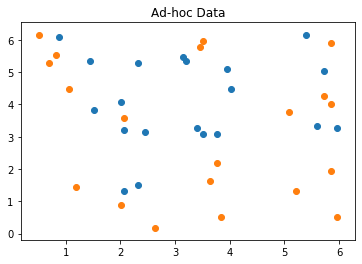

{'A': 0, 'B': 1}


In [2]:
feature_dim=2 # we support feature_dim 2 or 3
sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20, 
    test_size=10, 
    n=feature_dim, 
    gap=0.3, 
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_Total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [3]:
seed = 10598

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

from qiskit import IBMQ
provider = IBMQ.load_account()
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, skip_qobj_validation=False, timeout = None)

result = qsvm.run(quantum_instance)

print("testing success ratio: {}".format(result['testing_accuracy']))
print("preduction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], qsvm.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))

testing success ratio: 1.0
preduction of datapoints:
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
prediction:   ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [ ]:
training_input